<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib
!pip install numpy

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-12-26 16:28:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  72.0MB/s    in 2.1s    

2025-12-26 16:28:19 (72.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



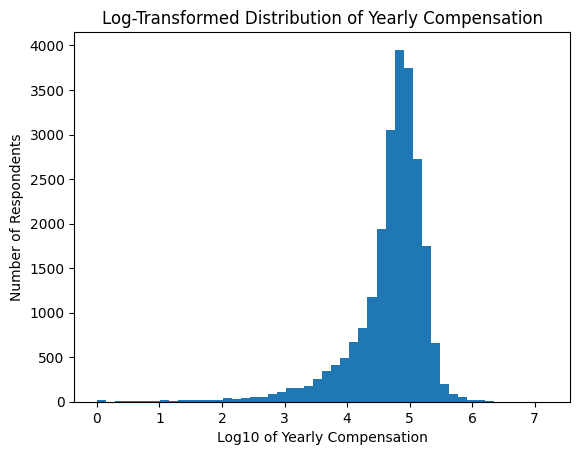

In [5]:
## Write your code here

# Drop missing values
comp_data = df['ConvertedCompYearly'].dropna()

# Log transform (use log10 for interpretability)
log_comp = np.log10(comp_data)

# Plot histogram of log-transformed compensation
plt.figure()
plt.hist(log_comp, bins=50)
plt.xlabel("Log10 of Yearly Compensation")
plt.ylabel("Number of Respondents")
plt.title("Log-Transformed Distribution of Yearly Compensation")

plt.show()

# After applying a log transformation, the compensation distribution becomes much more balanced and closer to a normal shape. This reduces the impact of extreme high salaries and makes it easier to observe patterns in typical earnings. Log transformation is useful when analyzing income data because compensation values often span several orders of magnitude.

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



Converted Age values: 65,115 (dropped 322 non-numeric/blank)


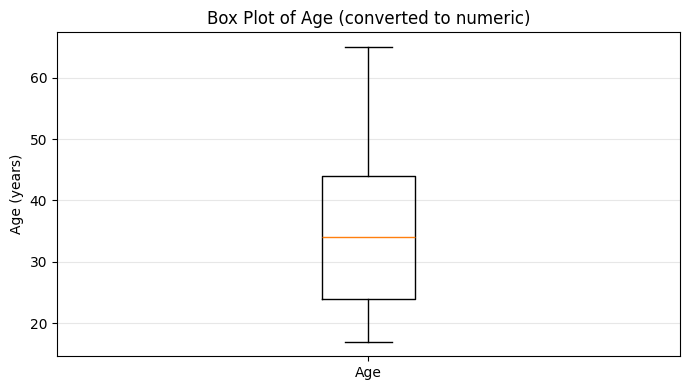

Interpretation: After converting the categorical Age values into numeric ages, the box plot shows the central age range where most respondents fall. The median age is about 34, with the middle 50% roughly between 24 and 44. Any points beyond the whiskers represent comparatively younger/older outliers in the sample.


In [11]:
## Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Convert Age (categorical strings) -> numeric for box plot ---
def age_to_number(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()

    # common non-age responses
    if s.lower() in {"prefer not to say", "na", "n/a", ""}:
        return np.nan

    # "Under 18 years old"
    if "under 18" in s.lower():
        return 17.0

    # "65 years or older"
    if "65 years or older" in s.lower():
        return 65.0

    # "44 years old" (or similar)
    m = re.search(r"(\d+)\s*years?\s*old", s.lower())
    if m:
        return float(m.group(1))

    # ranges like "35-44"
    m = re.search(r"^\s*(\d+)\s*-\s*(\d+)\s*$", s)
    if m:
        lo, hi = float(m.group(1)), float(m.group(2))
        return (lo + hi) / 2.0  # midpoint

    # fallback: first number found anywhere
    m = re.search(r"(\d+)", s)
    if m:
        return float(m.group(1))

    return np.nan

df["Age_num"] = df["Age"].apply(age_to_number)

age_clean = df["Age_num"].dropna()
print(f"Converted Age values: {len(age_clean):,} (dropped {df['Age_num'].isna().sum():,} non-numeric/blank)")

# --- Boxplot ---
plt.figure(figsize=(7, 4))
plt.boxplot(age_clean, vert=True, showfliers=True)
plt.title("Box Plot of Age (converted to numeric)")
plt.ylabel("Age (years)")
plt.xticks([1], ["Age"])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# --- Short interpretation ---
q1, med, q3 = np.percentile(age_clean, [25, 50, 75])
print(
    f"Interpretation: After converting the categorical Age values into numeric ages, "
    f"the box plot shows the central age range where most respondents fall. "
    f"The median age is about {med:.0f}, with the middle 50% roughly between {q1:.0f} and {q3:.0f}. "
    f"Any points beyond the whiskers represent comparatively younger/older outliers in the sample."
)

# The boxplot shows that respondents are primarily concentrated in the mid-career age range. The median age falls around the late 30s to early 40s, indicating that most participants are experienced working professionals. The interquartile range suggests a moderate spread in ages, while a smaller number of respondents appear at the younger and older ends, shown by the whiskers and potential outliers. Overall, the survey sample is dominated by working-age adults rather than very young or near-retirement individuals.


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



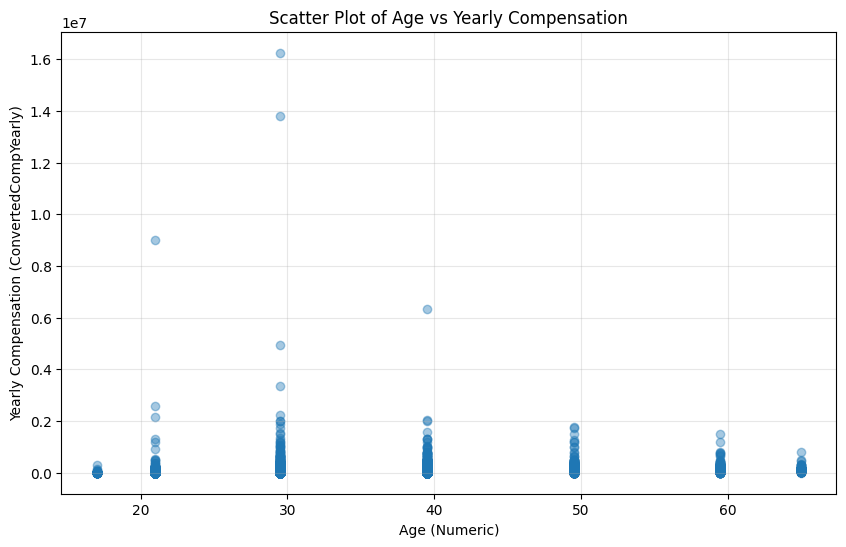

In [18]:
## Write your code here
# --- Make Age_numeric correctly from the categorical Age column ---

# 1) Grab the Age column as strings
age_str = df["Age"].astype(str)

# 2) Extract ranges like "35-44" -> low=35, high=44
age_range = age_str.str.extract(r"(\d+)\s*-\s*(\d+)")
low = pd.to_numeric(age_range[0], errors="coerce")
high = pd.to_numeric(age_range[1], errors="coerce")

# Midpoint for ranges (e.g., 35-44 -> 39.5)
age_mid = (low + high) / 2

# 3) Extract single numbers like "44 years old" or "65 years or older"
age_single = pd.to_numeric(age_str.str.extract(r"(\d+)")[0], errors="coerce")

# 4) Combine: use range midpoints when available, otherwise use single number
df["Age_numeric"] = age_mid.fillna(age_single)

# (Optional) If your data has "Under 18 years old", set it to 17
df.loc[age_str.str.contains("Under 18", na=False), "Age_numeric"] = 17

# --- Scatter plot: Age_numeric vs ConvertedCompYearly ---

plot_df = df[["Age_numeric", "ConvertedCompYearly"]].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(plot_df["Age_numeric"], plot_df["ConvertedCompYearly"], alpha=0.4)
plt.title("Scatter Plot of Age vs Yearly Compensation")
plt.xlabel("Age (Numeric)")
plt.ylabel("Yearly Compensation (ConvertedCompYearly)")
plt.grid(True, alpha=0.3)
plt.show()

# The points show wide variation in compensation at most ages, with some high-income outliers. If you now see ages spread across the full range (not just ~18 and ~65), your Age conversion is fixed; any remaining “pattern” is typically weak-to-moderate because compensation depends on many factors beyond age (role, location, experience, etc.).


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


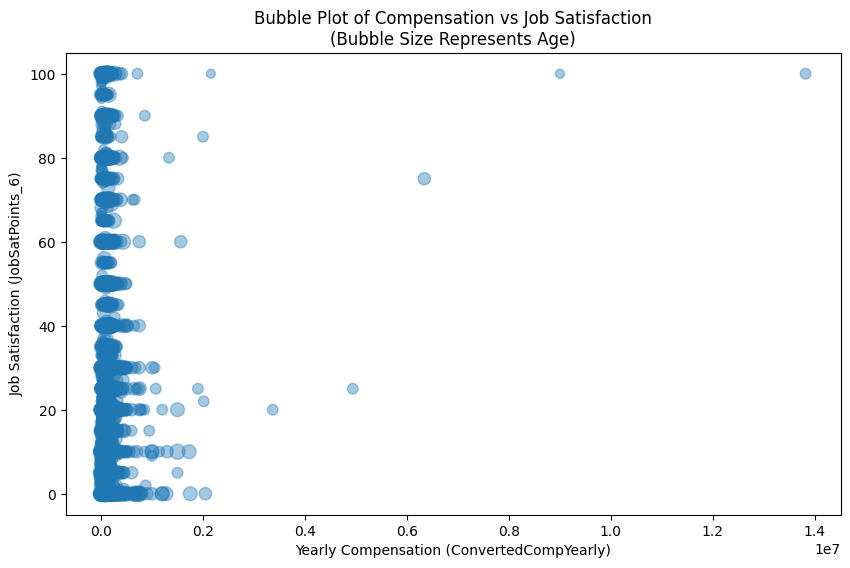

In [20]:
## Write your code here
# ---- Convert Age to numeric (same correct logic as before) ----
age_str = df["Age"].astype(str)

age_range = age_str.str.extract(r"(\d+)\s*-\s*(\d+)")
low = pd.to_numeric(age_range[0], errors="coerce")
high = pd.to_numeric(age_range[1], errors="coerce")
age_mid = (low + high) / 2

age_single = pd.to_numeric(age_str.str.extract(r"(\d+)")[0], errors="coerce")

df["Age_numeric"] = age_mid.fillna(age_single)
df.loc[age_str.str.contains("Under 18", na=False), "Age_numeric"] = 17

# ---- Clean data for bubble plot ----
bubble_df = df[
    ["ConvertedCompYearly", "JobSatPoints_6", "Age_numeric"]
].dropna()

# Scale age for bubble size (important)
bubble_sizes = bubble_df["Age_numeric"] * 2

# ---- Bubble plot ----
plt.figure(figsize=(10,6))
plt.scatter(
    bubble_df["ConvertedCompYearly"],
    bubble_df["JobSatPoints_6"],
    s=bubble_sizes,
    alpha=0.4
)

plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Bubble Plot of Compensation vs Job Satisfaction\n(Bubble Size Represents Age)")

plt.show()

# The bubble plot shows that higher compensation levels appear across a wide range of job satisfaction scores, suggesting that increased pay does not always correspond to higher satisfaction. Larger bubbles (representing older respondents) tend to cluster more toward mid to higher compensation levels, indicating that compensation generally increases with age. However, job satisfaction remains varied regardless of age or compensation, highlighting that factors beyond salary influence overall job satisfaction.


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



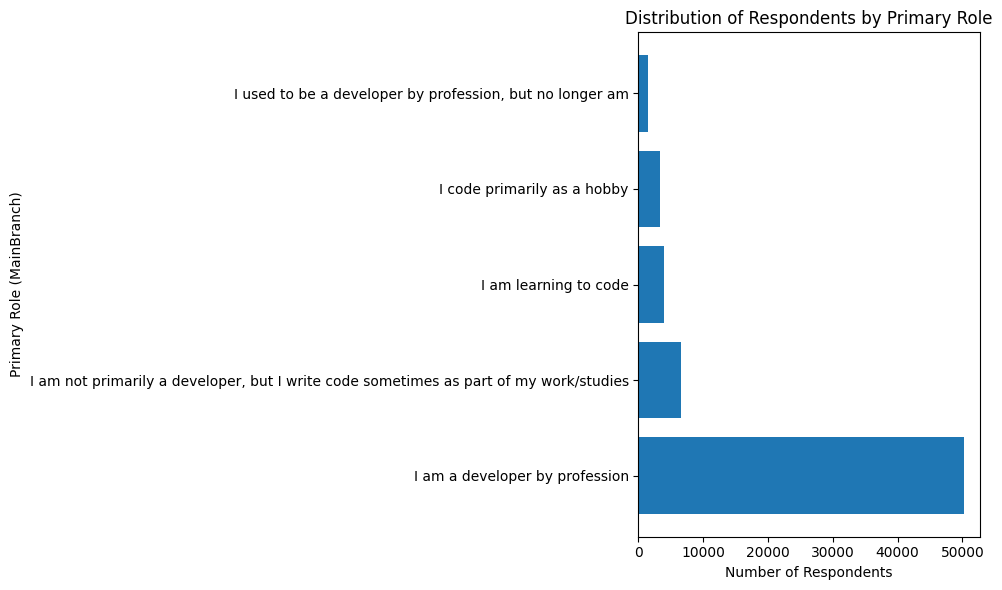

In [22]:
## Write your code here
# Count distribution of MainBranch
mainbranch_counts = df['MainBranch'].value_counts()

# Horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values)

plt.xlabel("Number of Respondents")
plt.ylabel("Primary Role (MainBranch)")
plt.title("Distribution of Respondents by Primary Role")

plt.tight_layout()
plt.show()

# The horizontal bar chart shows that the majority of respondents identify primarily as professional developers, indicating that the survey is heavily focused on individuals working directly in software development roles. Other categories, such as students, hobbyists, and those learning to code, appear in smaller proportions. This suggests the dataset mainly represents experienced professionals rather than casual or entry-level participants.


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



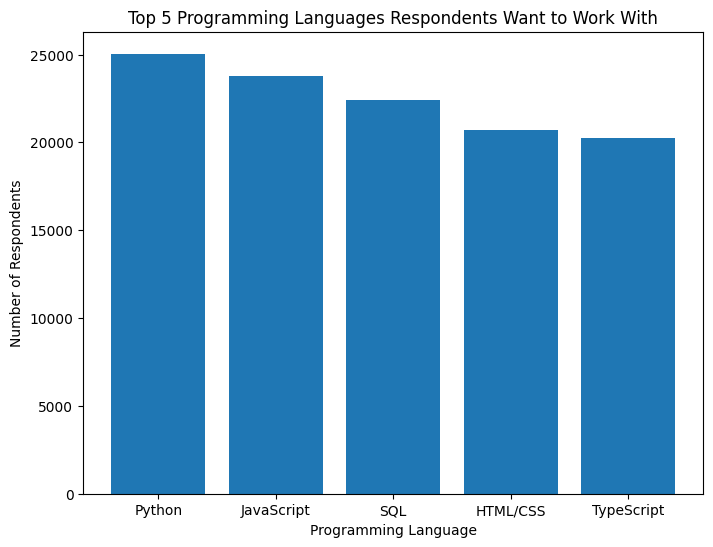

In [24]:
## Write your code here
# Split multiple languages into separate rows
languages = (
    df['LanguageWantToWorkWith']
    .dropna()
    .str.split(';')
    .explode()
)

# Get top 5 languages
top_languages = languages.value_counts().head(5)

# Vertical bar chart
plt.figure(figsize=(8,6))
plt.bar(top_languages.index, top_languages.values)

plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Programming Languages Respondents Want to Work With")

plt.show()

#The bar chart shows that a small group of programming languages dominates developer interest, with the top five languages receiving significantly more interest than others. This indicates strong demand for these languages in future work, reflecting current industry trends and the technologies developers are most eager to use or learn. Overall, developer interest appears concentrated rather than evenly distributed across languages.


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


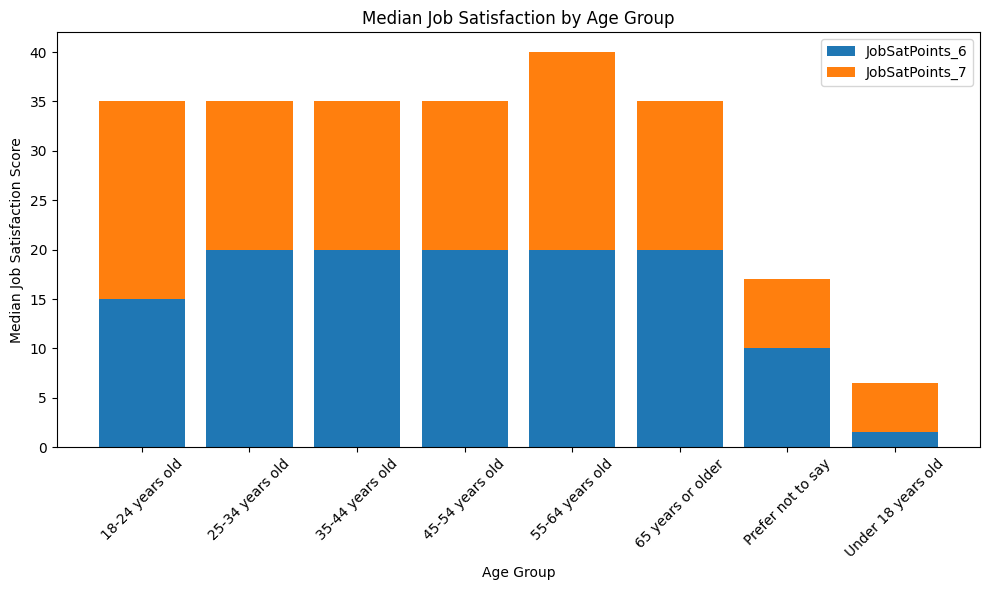

In [26]:
## Write your code here
# Select needed columns and drop missing values
sat_df = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Calculate median job satisfaction by age group
median_sat = sat_df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(
    median_sat.index,
    median_sat['JobSatPoints_6'],
    label='JobSatPoints_6'
)
plt.bar(
    median_sat.index,
    median_sat['JobSatPoints_7'],
    bottom=median_sat['JobSatPoints_6'],
    label='JobSatPoints_7'
)

plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Score")
plt.title("Median Job Satisfaction by Age Group")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# The stacked bar chart shows that median job satisfaction levels vary across age groups, with both satisfaction metrics generally remaining stable or slightly increasing through mid-career stages. While the relative contribution of each satisfaction measure differs by age group, overall satisfaction does not change dramatically with age. This suggests that job satisfaction is influenced by factors beyond age alone, such as role responsibilities, work environment, and career expectations.

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



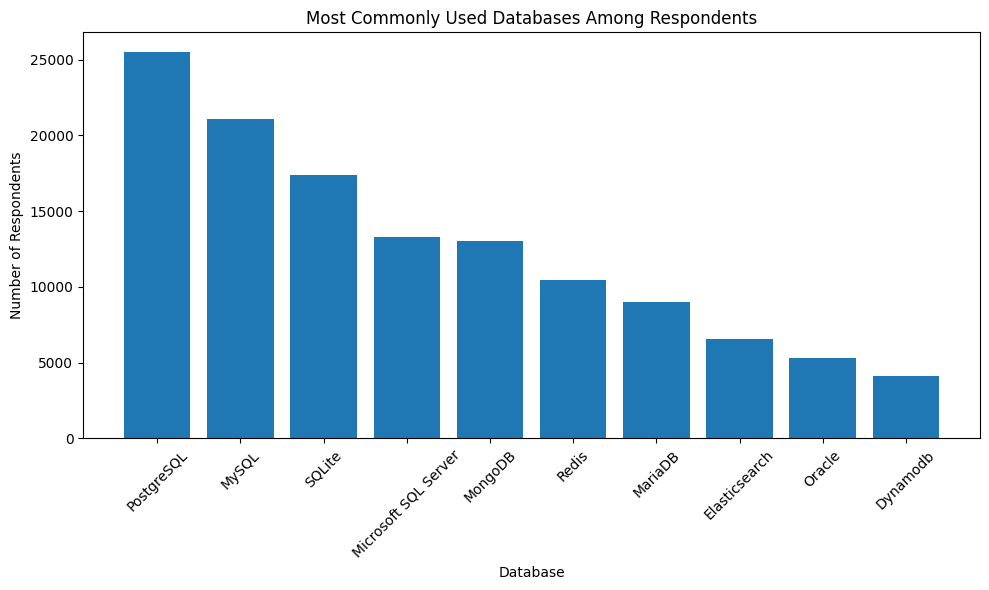

In [27]:
## Write your code here
# Split multiple databases into separate rows
databases = (
    df['DatabaseHaveWorkedWith']
    .dropna()
    .str.split(';')
    .explode()
)

# Count database usage
db_counts = databases.value_counts()

# Bar chart (top 10 for readability)
top_db = db_counts.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_db.index, top_db.values)

plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Most Commonly Used Databases Among Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The bar chart shows that a small number of databases dominate usage among respondents, with the top databases being used by a significantly larger portion of developers compared to others. This suggests that industry adoption is concentrated around a few widely supported and established database technologies, while many alternative databases are used by a smaller, more specialized group of respondents.


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



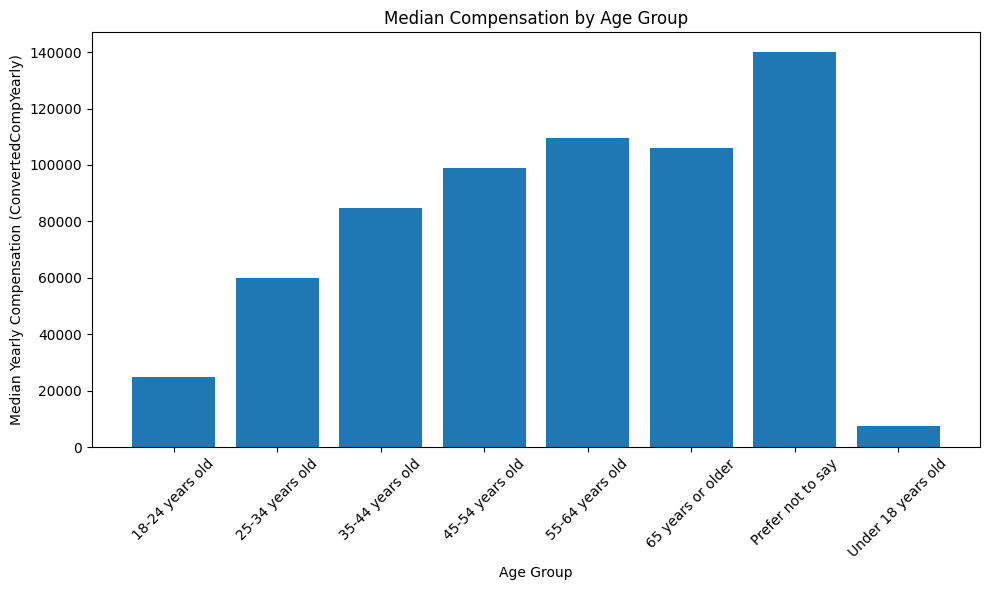

In [28]:
## Write your code here

# Select relevant columns and drop missing values
comp_df = df[['Age', 'ConvertedCompYearly']].dropna()

# Calculate median compensation by age group
median_comp = comp_df.groupby('Age')['ConvertedCompYearly'].median()

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(median_comp.index, median_comp.values)

plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (ConvertedCompYearly)")
plt.title("Median Compensation by Age Group")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# The bar chart shows that median yearly compensation generally increases across age groups, reflecting higher earnings as individuals progress through their careers. Compensation tends to peak in mid-to-later career age ranges, while younger age groups report lower median salaries. This trend suggests that experience and career advancement play a significant role in income growth over time.


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



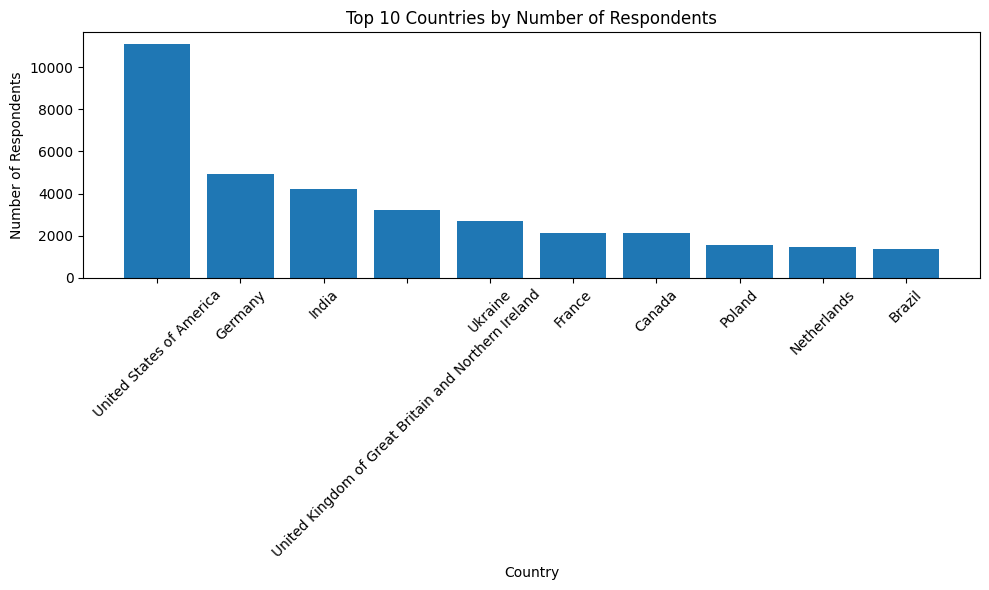

In [30]:
## Write your code here
# Count respondents by country
country_counts = df['Country'].value_counts().head(10)

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values)

plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.title("Top 10 Countries by Number of Respondents")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# The bar chart shows that survey responses are concentrated in a small number of countries, with the top countries contributing a large share of total respondents. This indicates that the dataset is more representative of certain regions, particularly those with strong technology sectors, while other countries are less represented. As a result, findings from the survey may reflect regional trends rather than a fully global perspective.


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
